In [1]:
import numpy as np
import pandas as pd

In [2]:
from tensorflow.keras.datasets import mnist

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
y_train.shape

(60000,)

In [5]:
X_train.shape

(60000, 28, 28)

In [6]:
X_test.shape

(10000, 28, 28)

In [7]:
import matplotlib.pyplot as plt

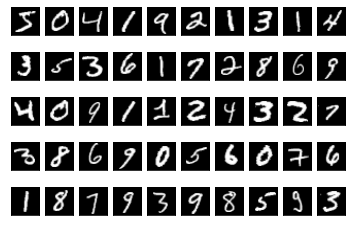

In [8]:
for digit_num in range(0,50):
    plt.subplot(5,10, digit_num+1)
    mat_data = X_train[digit_num].reshape(28,28)
    plt.imshow(mat_data, cmap = 'gray')
    plt.xticks([])
    plt.yticks([])

In [9]:
y_train[0:50]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9, 4, 0,
       9, 1, 1, 2, 4, 3, 2, 7, 3, 8, 6, 9, 0, 5, 6, 0, 7, 6, 1, 8, 7, 9,
       3, 9, 8, 5, 9, 3], dtype=uint8)

In [10]:
#X_train[0]*255

In [11]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [12]:
#[2,2
# 1,2]
# [2,2,1,2]

In [13]:
# Scaling images by dividing by 255
X_train = X_train/255
X_test = X_test/255

In [14]:
X_train = X_train.reshape(X_train.shape[0], 28*28)
X_test = X_test.reshape(X_test.shape[0], 28*28)

In [15]:
X_train.shape

(60000, 784)

In [16]:
X_test.shape

(10000, 784)

In [17]:
#X_train[0]

In [18]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [19]:
tf.random.set_seed(12345)

In [20]:
model = Sequential()

In [21]:
# First Hidden Layer
model.add(Dense(units=128, 
                activation='relu', 
                input_shape=(784,)))

In [22]:
# Second Hidden Layer
model.add(Dense(units=64, 
                activation='relu'))

In [23]:
# Third Hidden layer
model.add(Dense(units=32, 
                activation='relu'))

In [24]:
# Output Layer
model.add(Dense(units=10, 
                activation='softmax'))

In [30]:
array_val = [1,2,3]
print(array_val)
e_array = np.exp(array_val)
print(e_array)
e_array = e_array/np.sum(e_array)
print(e_array)
print(e_array.sum())
#np.exp(array_val)/np.sum(np.exp(array_val))

[1, 2, 3]
[ 2.71828183  7.3890561  20.08553692]
[0.09003057 0.24472847 0.66524096]
1.0


In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 10)                330       
                                                                 
Total params: 111,146
Trainable params: 111,146
Non-trainable params: 0
_________________________________________________________________


In [32]:
785*128

100480

In [34]:
model.compile(optimizer= tf.keras.optimizers.Adam(learning_rate = 0.001), 
              loss=tf.keras.losses.SparseCategoricalCrossentropy(), 
              metrics=['accuracy'])

In [63]:
result = model.fit(X_train, 
                   y_train,
                   validation_data = (X_test, y_test),
                   epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0342 - accuracy: 0.9908 - val_loss: 0.1007 - val_accuracy: 0.9791
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0075 - accuracy: 0.9977 - val_loss: 0.1131 - val_accuracy: 0.9793
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0041 - accuracy: 0.9988 - val_loss: 0.1351 - val_accuracy: 0.9792
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0111 - accuracy: 0.9968 - val_loss: 0.1241 - val_accuracy: 0.9815
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0094 - accuracy: 0.9972 - val_loss: 0.1247 - val_accuracy: 0.9797
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0066 - accuracy: 0.9979 - val_loss: 0.1493 - val_accuracy: 0.9801
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0076 - accuracy: 0.9977 - val_loss: 0.1336 - val_accuracy:

In [59]:
60000/100

600.0

In [37]:
#model.get_weights()

In [42]:
print(model.predict(X_train)[0])
print(np.argmax(model.predict(X_train)[0]))

[1.5680262e-14 3.5569812e-16 5.8722813e-13 2.0404112e-02 3.9821290e-22
 9.7959590e-01 1.5750776e-20 9.7829730e-14 4.2875100e-13 1.6087337e-09]
5


In [45]:
y_train_pred = np.argmax(model.predict(X_train), axis=1)

In [46]:
y_test_pred = np.argmax(model.predict(X_test),axis=1)

In [47]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [48]:
print("Confusion Matrix")
print(confusion_matrix(y_pred = y_train_pred, y_true=y_train))
print("\n")
print(f" Accuracy {accuracy_score(y_pred = y_train_pred, y_true=y_train)}")

Confusion Matrix
[[5918    0    2    1    0    0    1    0    0    1]
 [   0 6720   12    1    3    0    1    5    0    0]
 [   5    0 5944    3    1    0    2    2    0    1]
 [   2    2    1 6116    0    1    1    2    2    4]
 [   0    2    0    0 5831    0    3    2    0    4]
 [   4    0    1   33    1 5358    7    0   12    5]
 [   6    0    0    0    3    6 5901    0    2    0]
 [   1    8    1    0    1    0    0 6247    1    6]
 [  21   30    6    7    3    0   21    4 5756    3]
 [   1    7    0    3   64    0    0    7    3 5864]]


 Accuracy 0.99425


In [49]:
print("Confusion Matrix")
print(confusion_matrix(y_pred = y_test_pred, y_true=y_test))
print("\n")
print(f" Accuracy {accuracy_score(y_pred = y_test_pred, y_true=y_test)}")

Confusion Matrix
[[ 974    0    0    0    0    0    2    0    2    2]
 [   0 1128    4    2    0    0    1    0    0    0]
 [   2    2 1005    6    5    0    3    5    4    0]
 [   1    0    2  996    0    1    0    4    5    1]
 [   1    0    0    1  967    0    7    2    2    2]
 [   3    0    0   22    2  855    3    1    6    0]
 [   5    3    0    0    6    4  940    0    0    0]
 [   2    4    6    1    0    0    0 1006    2    7]
 [   7    2    3    7    5    2    3    4  938    3]
 [   1    4    0    3   16    1    2    6    1  975]]


 Accuracy 0.9784


In [50]:
history = pd.DataFrame(result.history)

In [51]:
history.head()

,loss,accuracy,val_loss,val_accuracy
0,0.248140,0.925217,0.133518,0.9586
1,0.102631,0.968833,0.102945,0.9687
2,0.073115,0.976967,0.080999,0.9738
3,0.055276,0.982233,0.082391,0.9736
4,0.044630,0.985217,0.083935,0.9767


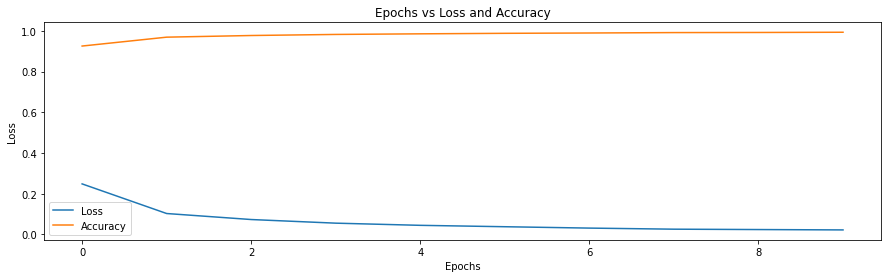

In [52]:
plt.figure(figsize = (15,4))
plt.plot(history.loss, label='Loss')
plt.plot(history.accuracy, label='Accuracy')
plt.title('Epochs vs Loss and Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='best')
plt.show()

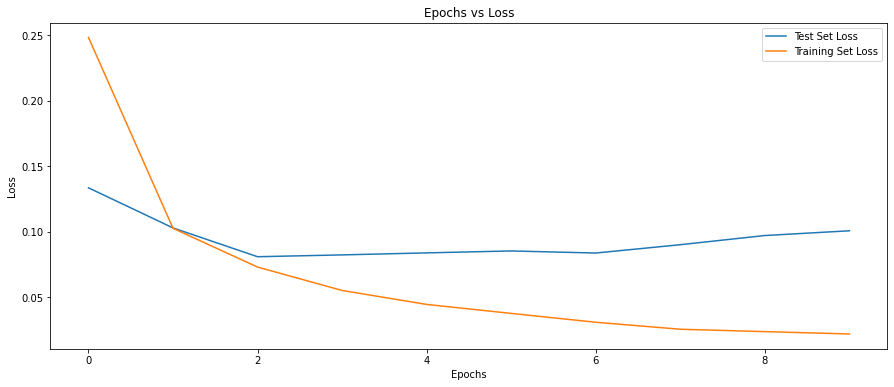

In [53]:
plt.figure(figsize = (15,6))
plt.plot(history.val_loss, label='Test Set Loss')
plt.plot(history.loss, label='Training Set Loss')
plt.title('Epochs vs Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

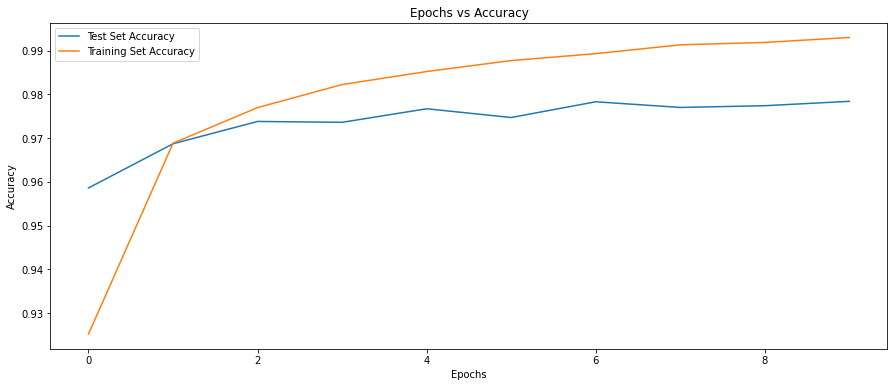

In [54]:
plt.figure(figsize = (15,6))
plt.plot(history.val_accuracy, label='Test Set Accuracy')
plt.plot(history.accuracy, label='Training Set Accuracy')
plt.title('Epochs vs Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()